In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load Data
df = pd.read_csv('KDDTest+.csv', header=None)

In [3]:
categorical_cols = [1, 2, 3]

#Label Encoding
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df[41] = df[41].apply(lambda x: 0 if x == 'normal' else 1)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Decision Tree Classifier

In [4]:
dtree = DecisionTreeClassifier(random_state=42, max_depth=None)
dtree.fit(X_train_scaled, y_train)


y_pred_dtree = dtree.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dtree))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dtree))

dtree_accuracy = accuracy_score(y_test, y_pred_dtree)

Accuracy: 0.8490314948987135

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.52      0.56        42
           1       0.44      0.37      0.40        30
           2       0.68      0.54      0.60        24
           3       0.56      0.59      0.58        32
           4       0.46      0.52      0.49        21
           5       0.38      0.33      0.36        30
           6       0.51      0.68      0.58        37
           7       0.66      0.62      0.64        82
           8       0.51      0.48      0.49        42
           9       0.25      0.29      0.27        24
          10       0.59      0.63      0.61        65
          11       0.77      0.80      0.78       143
          12       0.71      0.63      0.66       147
          13       0.65      0.68      0.66       153
          14       0.71      0.67      0.69       246
          15       0.79      0.81      0.80       342
          16       0.71    

Random Forest Classifier

In [5]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

rf_accuracy = accuracy_score(y_test, y_pred_rf)


Accuracy: 0.860416974715363

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.77        42
           1       0.52      0.53      0.52        30
           2       0.68      0.54      0.60        24
           3       0.56      0.69      0.62        32
           4       0.37      0.33      0.35        21
           5       0.50      0.47      0.48        30
           6       0.46      0.68      0.55        37
           7       0.69      0.62      0.65        82
           8       0.63      0.52      0.57        42
           9       0.33      0.33      0.33        24
          10       0.74      0.54      0.62        65
          11       0.77      0.83      0.80       143
          12       0.82      0.69      0.75       147
          13       0.71      0.75      0.73       153
          14       0.77      0.74      0.75       246
          15       0.79      0.82      0.80       342
          16       0.79     

In [14]:
svm_model = SVC(kernel='rbf', C=10, gamma= 'scale', class_weight='balanced')
svm_model.fit(X_train_scaled, y_train)


y_pred_svm = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

svm_accuracy = accuracy_score(y_test, y_pred_svm)

Accuracy: 0.7198
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.29      0.39        42
           1       0.42      0.50      0.45        30
           2       0.09      0.54      0.15        24
           3       0.50      0.53      0.52        32
           4       0.33      0.38      0.36        21
           5       0.41      0.57      0.48        30
           6       0.62      0.57      0.59        37
           7       0.76      0.57      0.65        82
           8       0.42      0.48      0.44        42
           9       0.28      0.42      0.33        24
          10       0.51      0.45      0.48        65
          11       0.63      0.62      0.62       143
          12       0.48      0.44      0.46       147
          13       0.43      0.59      0.50       153
          14       0.53      0.33      0.41       246
          15       0.73      0.55      0.63       342
          16       0.27      0.60      0.

LSTM

In [7]:
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [8]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(64))
model.add(Dropout(0.1))
model.add(Dense(22, activation='softmax'))  # Assuming 22 classes

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Class Weights
class_weight_dict = {
    0: 8.855218855218855, 1: 12.583732057416269, 2: 23.13782991202346, 3: 8.53896103896104,
    4: 8.965909090909092, 5: 9.825653798256537, 6: 6.027501909854851, 7: 4.295046271094176,
    8: 8.059244126659857, 9: 8.747228381374724, 10: 5.5174825174825175, 11: 2.2555746140651802,
    12: 2.115848753016895, 13: 1.9597615499254843, 14: 1.463821892393321, 15: 0.8600392413342054,
    16: 1.4698211624441133, 17: 0.8398978071109219, 18: 0.34617409617409617, 19: 1.1513205895228367,
    20: 0.7479381931936676, 21: 0.09635582042889942
}

# Fit the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    class_weight=class_weight_dict
)

# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

from sklearn.metrics import classification_report
import numpy as np

y_pred_lstm = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_lstm, axis=1)

print(classification_report(y_test, y_pred_classes))

lstm_accuracy = accuracy

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


198/198 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.3546 - loss: 2.8325 - val_accuracy: 0.4284 - val_loss: 2.0833
Epoch 2/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4583 - loss: 2.3654 - val_accuracy: 0.4468 - val_loss: 1.8551
Epoch 3/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4809 - loss: 2.1887 - val_accuracy: 0.5035 - val_loss: 1.7762
Epoch 4/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5026 - loss: 2.1668 - val_accuracy: 0.4490 - val_loss: 1.7205
Epoch 5/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5353 - loss: 2.0762 - val_accuracy: 0.5596 - val_loss: 1.5648
Epoch 6/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5440 - loss: 2.0633 - val_accuracy: 0.5016 - val_loss: 1.6646
Epoch 7/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5420 - loss: 2.0438 - val_accuracy: 0.5843 - val_loss: 1.4793
Epoch 8/20
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5745 - loss: 1.9178 - val_accuracy: 0.5887 - va

Confusion Matrices

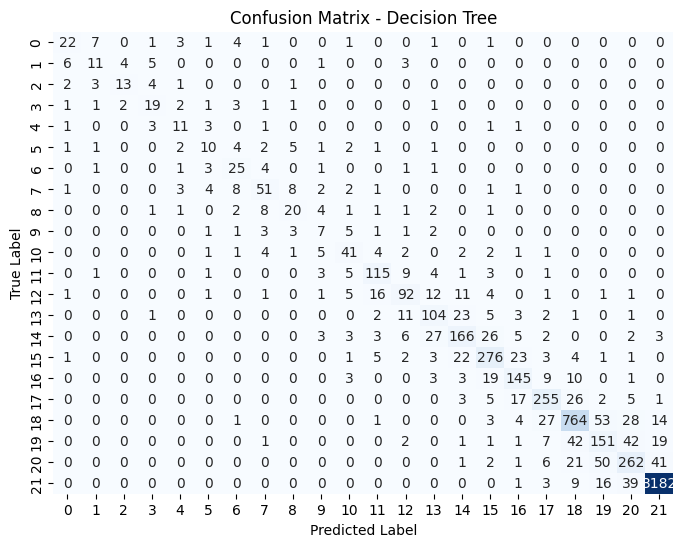

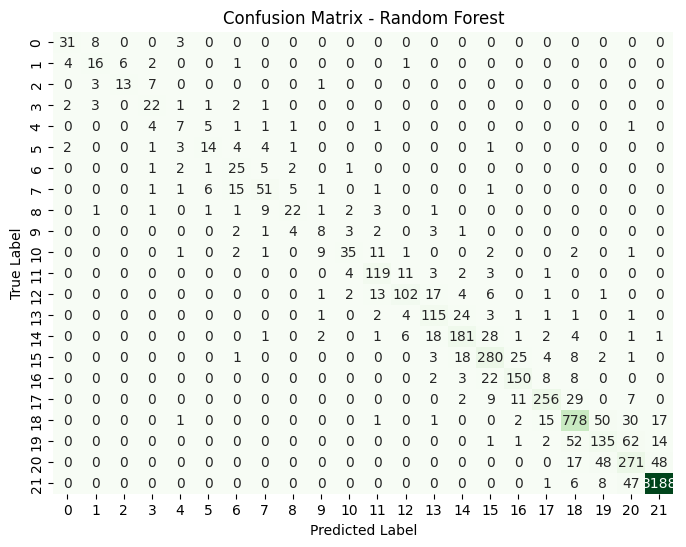

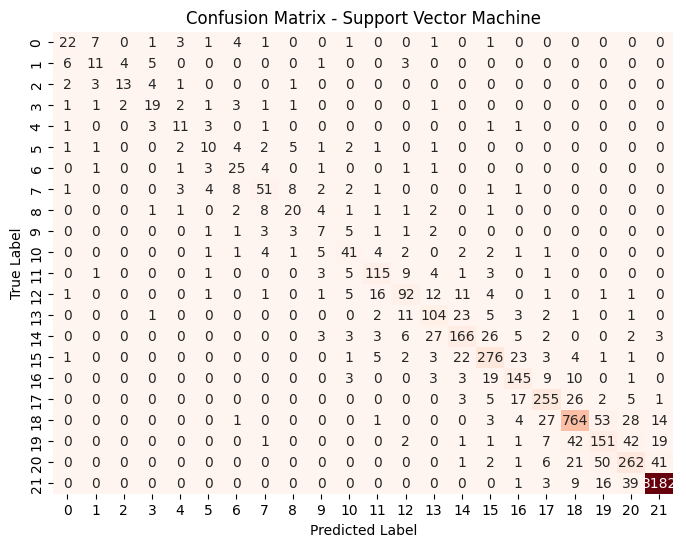

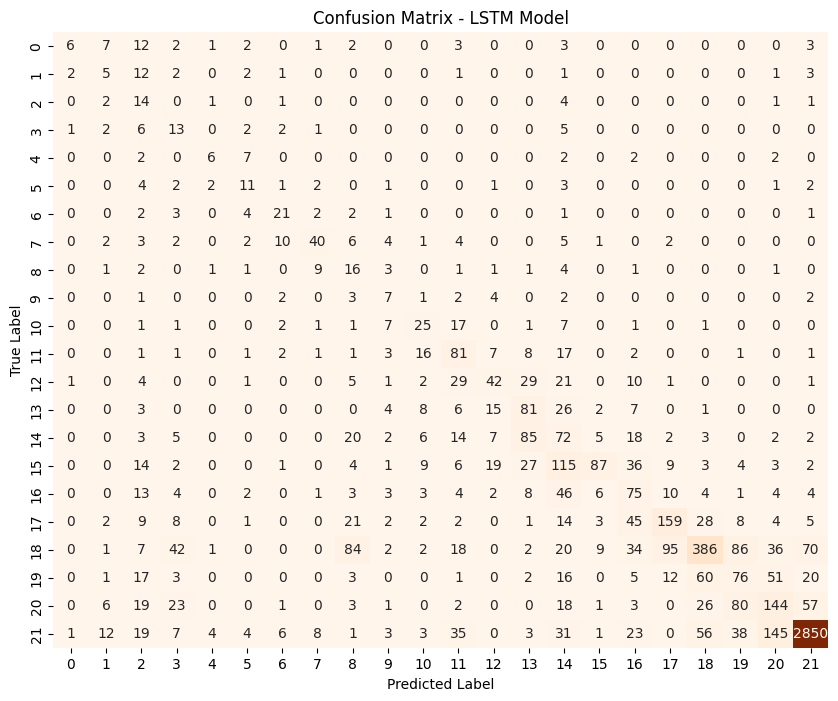

In [17]:
# DecisionTree Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dtree)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# RandomForrest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False)

plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)

plt.title('Confusion Matrix - Support Vector Machine')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# LSTM Confusin Matrix
cm_lstm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Oranges', cbar=False)

plt.title('Confusion Matrix - LSTM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy Comparision

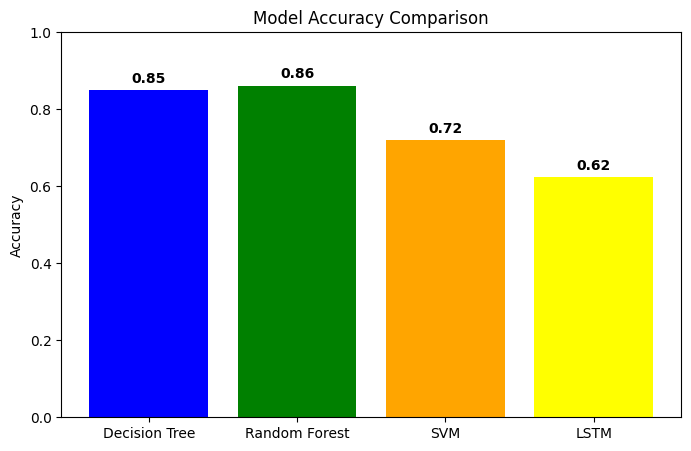

In [16]:
models = ['Decision Tree', 'Random Forest', 'SVM', 'LSTM']
accuracies = [dtree_accuracy, rf_accuracy, svm_accuracy, lstm_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'yellow'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

Scatter Plots of Classification Reports

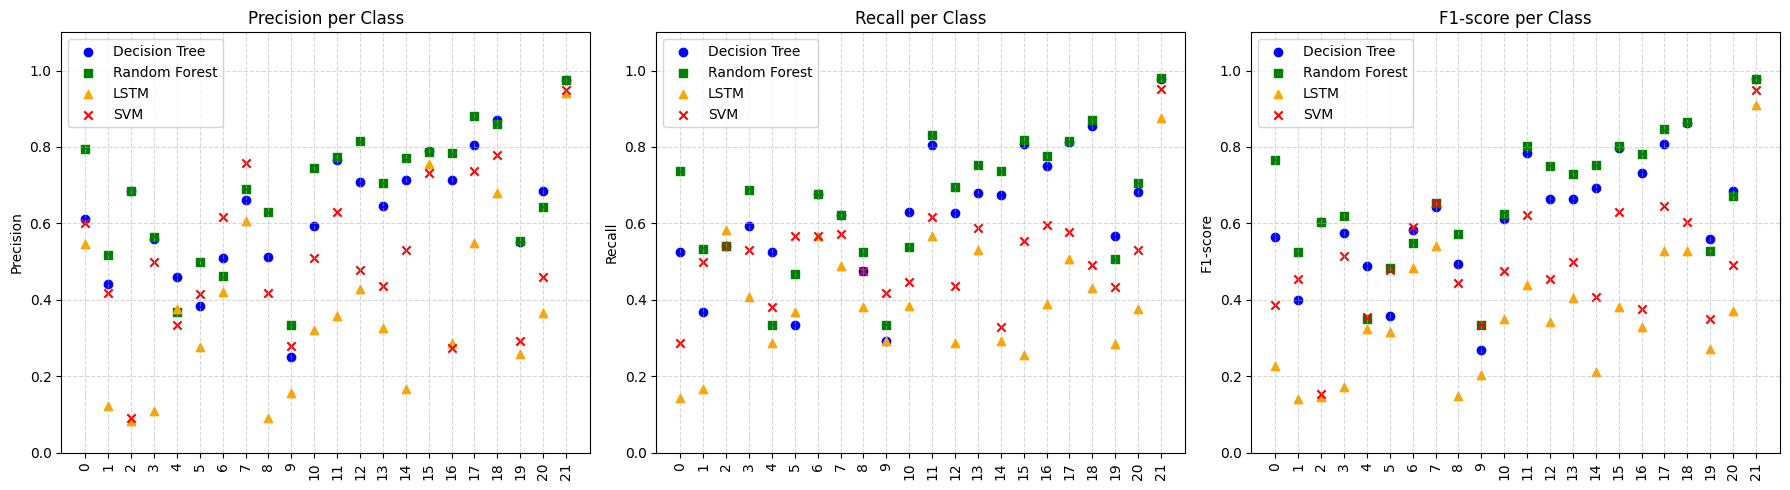

In [18]:
report_dtree = classification_report(y_test, y_pred_dtree, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_lstm = classification_report(y_test, y_pred_classes, output_dict=True)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)


class_labels = [str(i) for i in range(22)]

def extract_metrics(report, labels):
    precision = []
    recall = []
    f1 = []
    for label in labels:
        precision.append(report[label]['precision'])
        recall.append(report[label]['recall'])
        f1.append(report[label]['f1-score'])
    return precision, recall, f1

dtree_precision, dtree_recall, dtree_f1 = extract_metrics(report_dtree, class_labels)
rf_precision, rf_recall, rf_f1 = extract_metrics(report_rf, class_labels)
lstm_precision, lstm_recall, lstm_f1 = extract_metrics(report_lstm, class_labels)
svm_precision, svm_recall, svm_f1 = extract_metrics(report_svm, class_labels)

x = np.arange(len(class_labels))

plt.figure(figsize=(18, 5))

# Precision
plt.subplot(1, 3, 1)
plt.scatter(x, dtree_precision, label='Decision Tree', color='blue', marker='o')
plt.scatter(x, rf_precision, label='Random Forest', color='green', marker='s')
plt.scatter(x, lstm_precision, label='LSTM', color='orange', marker='^')
plt.scatter(x, svm_precision, label='SVM', color='red', marker='x')
plt.xticks(x, class_labels, rotation=90)
plt.title('Precision per Class')
plt.ylabel('Precision')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Recall
plt.subplot(1, 3, 2)
plt.scatter(x, dtree_recall, label='Decision Tree', color='blue', marker='o')
plt.scatter(x, rf_recall, label='Random Forest', color='green', marker='s')
plt.scatter(x, lstm_recall, label='LSTM', color='orange', marker='^')
plt.scatter(x, svm_recall, label='SVM', color='red', marker='x')
plt.xticks(x, class_labels, rotation=90)
plt.title('Recall per Class')
plt.ylabel('Recall')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

#F1 Score
plt.subplot(1, 3, 3)
plt.scatter(x, dtree_f1, label='Decision Tree', color='blue', marker='o')
plt.scatter(x, rf_f1, label='Random Forest', color='green', marker='s')
plt.scatter(x, lstm_f1, label='LSTM', color='orange', marker='^')
plt.scatter(x, svm_f1, label='SVM', color='red', marker='x')
plt.xticks(x, class_labels, rotation=90)
plt.title('F1-score per Class')
plt.ylabel('F1-score')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()